# General Preparation

In [6]:
import os
os.chdir("/home/jovyan/work")

# Control Task 4.1

[0 1 0 0 0 0 0 1 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.


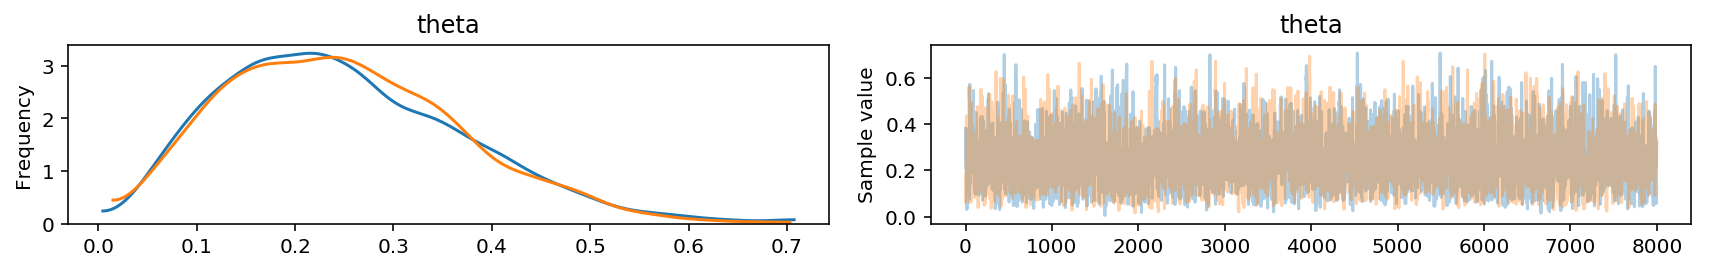

In [9]:
# %load src/4-01-coin-toss.py
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy.stats import bernoulli

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
y = bernoulli(0.22).rvs(10)
print(y)

# Inferece
with pm.Model() as model:
    theta = pm.Beta("theta", alpha=1, beta=1)
    throw = pm.Bernoulli("throw", theta, observed=y)
    trace = pm.sample(10000, step=pm.Metropolis(), progressbar=False)

pm.traceplot(trace[2000:])
plt.savefig("./results/4-01-coin-toss.png")

[0 1 0 0 0 0 0 1 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.


[0 1 0 0 0 0 0 1 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.


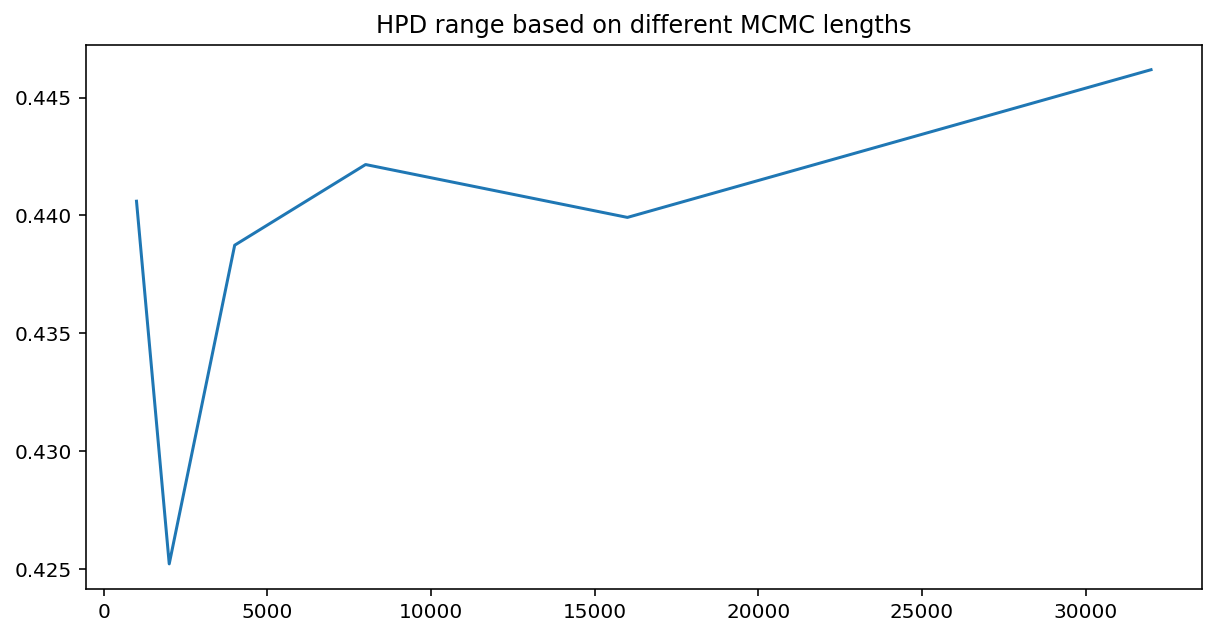

In [44]:
# %load src/4-04-hpd-chain-length.py
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import bernoulli

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
y = bernoulli(0.22).rvs(10)
print(y)
chains = 1000 * 2**np.arange(6)
cols = ['mean', 'sd', 'mc_error', 'hpd_2.5', 'hpd_97.5', 'n_eff', 'Rhat']
df_summaries = pd.DataFrame(columns=cols)

# Inferece
for chain in chains:
    with pm.Model() as model:
        theta = pm.Beta("theta", alpha=1, beta=1)
        throw = pm.Bernoulli("throw", theta, observed=y)
        trace = pm.sample(chain, step=pm.Metropolis(), progressbar=False)
        df_summaries = df_summaries.append(pm.summary(trace))

# Calculate the HPD interval range
df_summaries["hpd"] = df_summaries["hpd_97.5"] - df_summaries["hpd_2.5"]

plt.plot(chains, df_summaries["hpd"])
plt.title("HPD range based on different MCMC lengths")
plt.savefig("./results/4-04-hpd-chain-length.png")